# Homework : 3 Machine Learning - 1 (Supervised Methods)

## 4. Code up a 2-class perceptron learning algorithm and classifier.

### Importing Necessary Libraries

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

#Importing the nearestMeansClassifier library from utils package.
from utils import  perceptron

### Loading the Training Data and Testing Data from dataset-1 using Pandas

In [2]:
train_data_1 = pd.read_csv("./HW3_datasets/dataset1_train.csv", header=None)
print("Train Data -> 1: ")
print(train_data_1.head())
print()

test_data_1 = pd.read_csv("./HW3_datasets/dataset1_test.csv", header=None)
print("Test Data -> 1: ")
print(test_data_1.head())

Train Data -> 1: 
          0         1    2
0  2.199291  3.690399  1.0
1  0.472634 -0.709271  2.0
2 -0.026662 -1.335827  2.0
3 -0.116866 -1.336345  2.0
4  2.100909  1.143771  2.0

Test Data -> 1: 
          0         1    2
0  1.226845  0.273791  2.0
1 -0.929775  0.300098  1.0
2  0.220924  0.835073  1.0
3  0.783772 -0.233020  2.0
4  2.116507  0.728805  2.0


### Loading the Training Data and Testing Data from dataset-2 using Pandas

In [3]:
train_data_2 = pd.read_csv("./HW3_datasets/dataset2_train.csv", header=None)
print("Train Data -> 2: ")
print(train_data_2.head())
print()

test_data_2 = pd.read_csv("./HW3_datasets/dataset2_test.csv", header=None)
print("Train Data -> 2: ")
print(test_data_2.head())
print()

Train Data -> 2: 
          0         1    2
0  0.493655  0.905948  1.0
1  0.872053 -0.355721  2.0
2 -0.009021  0.132694  2.0
3 -0.578481  1.000596  1.0
4 -0.438395  1.038901  1.0

Train Data -> 2: 
          0         1    2
0 -0.070044 -0.118457  2.0
1 -0.824375  0.892066  1.0
2  1.384810  0.016317  2.0
3  0.304828  0.286498  2.0
4  1.651588  0.902572  1.0



### Loading the Training Data and Testing Data from dataset-3 using Pandas


In [4]:
train_data_3 = pd.read_csv("./HW3_datasets/dataset3_train.csv", header=None)
print("Train Data -> 3: ")
print(train_data_3.head())
print()

test_data_3 = pd.read_csv("./HW3_datasets/dataset3_test.csv", header=None)
print("Train Data -> 3: ")
print(test_data_3.head())

print()

Train Data -> 3: 
          0         1    2
0 -3.182181  1.966441  1.0
1  0.245498  1.287367  2.0
2  0.480500  0.785206  2.0
3  0.338015 -0.906211  1.0
4  0.396452  1.345380  2.0

Train Data -> 3: 
          0         1    2
0  0.624833  1.394105  2.0
1  2.976187 -0.119177  1.0
2  0.489271 -2.653542  1.0
3  0.159336  1.642712  2.0
4  0.059028  0.772479  2.0



## 4. (a) Perform the following for Dataset - 1 of Homework -> 1

### i] Run the perceptron learning algorithm to find optimum w_vector using Sequential Gradient Descent.

In [5]:
perceptron_1 = perceptron.Perceptron()

In [6]:
n_train_1, X_train_1, T_train_1 = perceptron_1.generateTrainData(trainData=train_data_1)
X_train_augmented_1 = perceptron_1.augmentData(X=X_train_1, n=n_train_1)
print(f"Shape of Augmented X_train_1: {X_train_augmented_1.shape}")

T_train_changed_1 = perceptron_1.changeLabels(T = T_train_1)

X_train_shuffled_1, T_train_shuffled_1 = perceptron_1.shuffleData(X=X_train_augmented_1, T=T_train_changed_1.reshape(n_train_1, 1))

w_vector_1 = perceptron_1.initializeWeights(0.1)

---------------------------------------------------
  Shape of Input Data: (100, 3)
  Number of Data Points: 100
  Number of Input Features: 2
  Number of Target Classes: 2
---------------------------------------------------
Shape of Augmented X_train_1: (100, 3)


In [7]:
convergenceFlag_1, n_epochs_1, n_epochs_arr_1, n_iters_1, n_iters_arr_1, J_History_epochs_1, w_History_epochs_1, J_History_iterations_1, cer_History_epochs_1, cer_History_iterations_1 = perceptron_1.modelTrain_SequentialGD(
                                                                                                                                                                n_train = n_train_1, 
                                                                                                                                                                X_train=X_train_shuffled_1, 
                                                                                                                                                                T_train=T_train_shuffled_1, 
                                                                                                                                                                w_vector=w_vector_1, 
                                                                                                                                                                epochs=10, 
                                                                                                                                                                learn_rate=1)

### i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)

In [8]:
optimum_index_epochs_1 = np.argmin(J_History_epochs_1)
optimum_index_iterations_1 = np.argmin(cer_History_iterations_1)

w_optimum_epochs_1 = w_History_epochs_1[optimum_index_epochs_1]
J_optimum_epochs_1 = J_History_epochs_1[optimum_index_epochs_1]
J_optimum_iterations_1 = J_History_iterations_1[optimum_index_iterations_1]
cer_optimum_epochs_1 = cer_History_epochs_1[optimum_index_epochs_1]
cer_optimum_iterations_1 = cer_History_iterations_1[optimum_index_iterations_1]

In [9]:
if convergenceFlag_1:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters_1} iterations and {n_epochs_1} epoch(s) for Training set of Dataset - 1!")
    print("DATASET - 1 IS LINEARLY SEPARABLE!!")
else:
    print("The Perceptron Learning Algorithm did not converge for Training set of Dataset - 1 and it took {n_iters_1} iterations and {n_epochs_1} epoch(s)!")

print(f"The optimum value of w_vector for Training Set of Dataset - 1 is: {w_optimum_epochs_1}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs_1}")

The Perceptron Learning Algorithm got converged after 44 iterations and 1 epoch(s) for Training set of Dataset - 1!
DATASET - 1 IS LINEARLY SEPARABLE!!
The optimum value of w_vector for Training Set of Dataset - 1 is: [[ 1.1       ]
 [-3.21311417]
 [ 2.77068634]]
The Final Criterion function value for optimum value of w is: 0


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

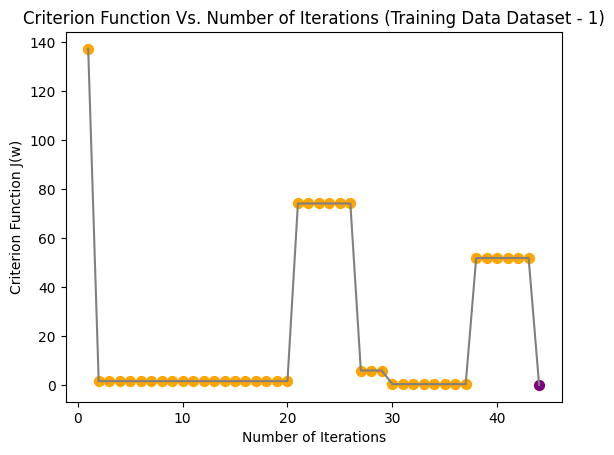

In [10]:
if n_epochs_1 <= 10:
    perceptron_1.plotCriterionVsIters(n_iters=n_iters_arr_1, J_History_iters=J_History_iterations_1, J_optimum_iters=J_optimum_iterations_1, datasetName="Training Data Dataset - 1")

else:
    perceptron_1.plotCriterionVsEpochs(n_epochs=n_epochs_arr_1, J_History_epochs=J_History_epochs_1, J_optimum_epochs=J_optimum_epochs_1, datasetName="Training Data Dataset - 1")

### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations

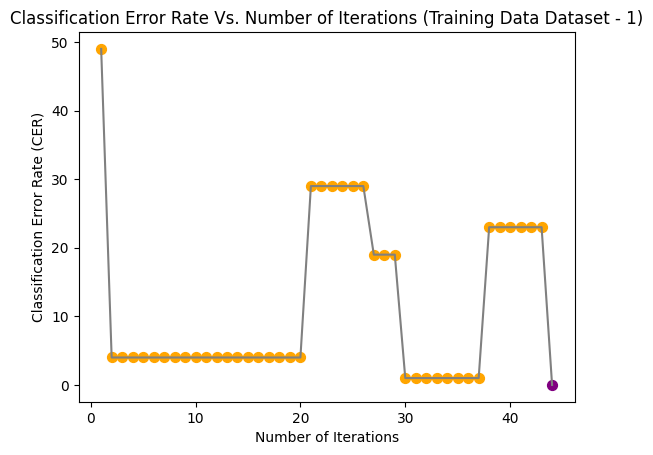

In [11]:
if n_epochs_1 <= 10:
    perceptron_1.plotCERVsIters(n_iters=n_iters_arr_1, cer_History_iters=cer_History_iterations_1, cer_optimum_iters=cer_optimum_iterations_1, datasetName="Training Data Dataset - 1")

else:
    perceptron_1.plotCriterionVsEpochs(n_epochs=n_epochs_arr_1, cer_History_epochs=cer_History_epochs_1, cer_optimum_epochs=cer_optimum_epochs_1, datasetName="Training Data Dataset - 1")

### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.

In [12]:
Y_hat_training_1 = perceptron_1.predict(X=X_train_augmented_1, w_optimum=w_optimum_epochs_1)
cer_training_1 = perceptron_1.calculateCER(T=T_train_changed_1, Y_hat=Y_hat_training_1, n=n_train_1)
print(f"Classification Error Rate (CER) on the training data of Dataset - 1 is: {cer_training_1}")

Classification Error Rate (CER) on the training data of Dataset - 1 is: 0.0


### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.

In [13]:
n_test_1, X_test_1, T_test_1 = perceptron_1.generateTestData(test_data=test_data_1)

X_test_augmented_1 = perceptron_1.augmentData(X=X_test_1, n=n_test_1)
print(f"Shape of Augmented X_test_1: {X_test_augmented_1.shape}")

T_test_changed_1 = perceptron_1.changeLabels(T = T_test_1)


Shape of Augmented X_test_1: (100, 3)


In [14]:
Y_hat_test_1 = perceptron_1.predict(X=X_test_augmented_1, w_optimum=w_optimum_epochs_1)
cer_test_1 = perceptron_1.calculateCER(T=T_test_changed_1, Y_hat=Y_hat_test_1, n=n_test_1)
print(f"Classification Error Rate (CER) on the test data of Dataset - 1 is: {cer_test_1}")

Classification Error Rate (CER) on the test data of Dataset - 1 is: 2.0


### Plot in feature space the training data points, decision boundaries, and decision regions. The decision boundaries and regions should use the final optimum w_vector.

/Users/sk/ee559-mlOne/HW-3/utils/perceptron.py:551: UserWarning: The following kwargs were not used by contour: 'c'
  ax.contour(x, y, z, [0], c="purple")


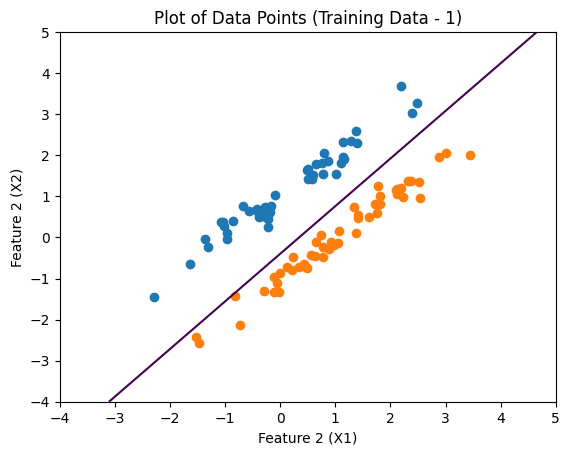

In [15]:
perceptron_1.plotDecisionBoundary(np.hstack((X_train_1, T_train_changed_1.reshape(n_train_1, 1))), w_vector=w_optimum_epochs_1, datasetName="Training Data - 1")

## 4. (b) Perform the following for Dataset - 2 of Homework -> 2


### i] Run the perceptron learning algorithm to find optimum w_vector using Sequential Gradient Descent.


In [16]:
perceptron_2 = perceptron.Perceptron()


In [17]:
n_train_2, X_train_2, T_train_2 = perceptron_2.generateTrainData(trainData=train_data_2)
X_train_augmented_2 = perceptron_2.augmentData(X=X_train_2, n=n_train_2)
print(f"Shape of Augmented X_train_2: {X_train_augmented_1.shape}")

T_train_changed_2 = perceptron_2.changeLabels(T = T_train_2)

X_train_shuffled_2, T_train_shuffled_2 = perceptron_2.shuffleData(X=X_train_augmented_2, T=T_train_changed_2.reshape(n_train_2, 1))

w_vector_2 = perceptron_2.initializeWeights(0.1)

---------------------------------------------------
  Shape of Input Data: (100, 3)
  Number of Data Points: 100
  Number of Input Features: 2
  Number of Target Classes: 2
---------------------------------------------------
Shape of Augmented X_train_2: (100, 3)


In [18]:
convergenceFlag_2, n_epochs_2, n_epochs_arr_2, n_iters_2, n_iters_arr_2, J_History_epochs_2, w_History_epochs_2, J_History_iterations_2, cer_History_epochs_2, cer_History_iterations_2 = perceptron_2.modelTrain_SequentialGD(
                                                                                                                                                                n_train = n_train_2, 
                                                                                                                                                                X_train=X_train_shuffled_2, 
                                                                                                                                                                T_train=T_train_shuffled_2, 
                                                                                                                                                                w_vector=w_vector_2, 
                                                                                                                                                                epochs=10, 
                                                                                                                                                                learn_rate=1)

### i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)


In [19]:
optimum_index_epochs_2 = np.argmin(J_History_epochs_2)
optimum_index_iterations_2 = np.argmin(cer_History_iterations_2)

w_optimum_epochs_2 = w_History_epochs_2[optimum_index_epochs_2]
J_optimum_epochs_2 = J_History_epochs_2[optimum_index_epochs_2]
J_optimum_iterations_2 = J_History_iterations_2[optimum_index_iterations_2]
cer_optimum_epochs_2 = cer_History_epochs_2[optimum_index_epochs_2]
cer_optimum_iterations_2 = cer_History_iterations_2[optimum_index_iterations_2]

In [20]:
if convergenceFlag_2:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters_2} iterations and {n_epochs_2} epoch(s) for Training set of Dataset - 2!")
    print("DATASET - 2 IS LINEARLY SEPARABLE!!")
else:
    print("The Perceptron Learning Algorithm did not converge for Training set of Dataset - 2 and it took {n_iters_2} iterations and {n_epochs_2} epoch(s)!")

print(f"The optimum value of w_vector for Training Set of Dataset - 2 is: {w_optimum_epochs_2}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs_2}")

The Perceptron Learning Algorithm got converged after 143 iterations and 2 epoch(s) for Training set of Dataset - 2!
DATASET - 2 IS LINEARLY SEPARABLE!!
The optimum value of w_vector for Training Set of Dataset - 2 is: [[-1.9       ]
 [-0.06798506]
 [ 4.23663294]]
The Final Criterion function value for optimum value of w is: 0


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

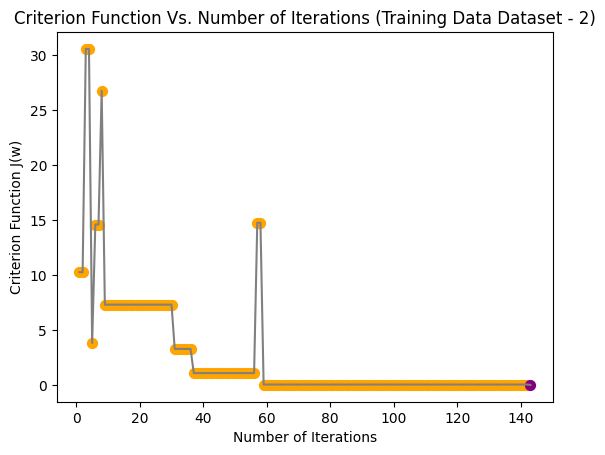

In [21]:
if n_epochs_2 <= 10:
    perceptron_2.plotCriterionVsIters(n_iters=n_iters_arr_2, J_History_iters=J_History_iterations_2, J_optimum_iters=J_optimum_iterations_2, datasetName="Training Data Dataset - 2")

else:
    perceptron_2.plotCriterionVsEpochs(n_epochs=n_epochs_arr_2, J_History_epochs=J_History_epochs_2, J_optimum_epochs=J_optimum_epochs_2, datasetName="Training Data Dataset - 2")

### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations


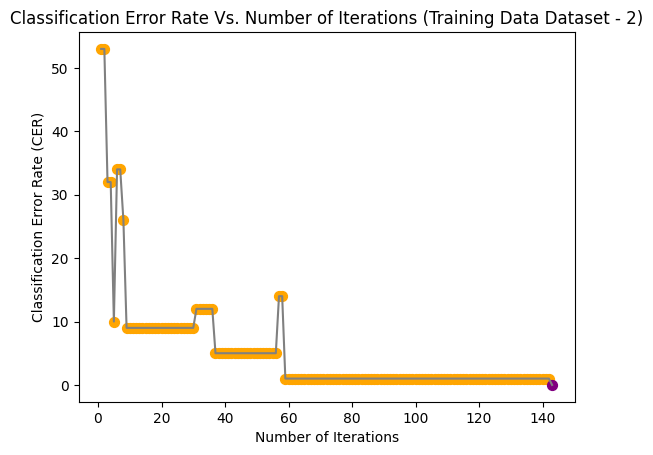

In [22]:
if n_epochs_2 <= 10:
    perceptron_2.plotCERVsIters(n_iters=n_iters_arr_2, cer_History_iters=cer_History_iterations_2, cer_optimum_iters=cer_optimum_iterations_2, datasetName="Training Data Dataset - 2")

else:
    perceptron_2.plotCriterionVsEpochs(n_epochs=n_epochs_arr_2, cer_History_epochs=cer_History_epochs_2, cer_optimum_epochs=cer_optimum_epochs_2, datasetName="Training Data Dataset - 2")

### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.

In [23]:
Y_hat_training_2 = perceptron_2.predict(X=X_train_augmented_2, w_optimum=w_optimum_epochs_2)
cer_training_2 = perceptron_2.calculateCER(T=T_train_changed_2, Y_hat=Y_hat_training_2, n=n_train_2)
print(f"Classification Error Rate (CER) on the training data of Dataset - 2 is: {cer_training_2}")

Classification Error Rate (CER) on the training data of Dataset - 2 is: 0.0


### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.


In [24]:
n_test_2, X_test_2, T_test_2 = perceptron_2.generateTestData(test_data=test_data_2)

X_test_augmented_2 = perceptron_2.augmentData(X=X_test_2, n=n_test_2)
print(f"Shape of Augmented X_test_2: {X_test_augmented_2.shape}")

T_test_changed_2 = perceptron_2.changeLabels(T = T_test_2)

Shape of Augmented X_test_2: (100, 3)


In [25]:
Y_hat_test_2 = perceptron_2.predict(X=X_test_augmented_2, w_optimum=w_optimum_epochs_2)
cer_test_2 = perceptron_2.calculateCER(T=T_test_changed_2, Y_hat=Y_hat_test_2, n=n_test_2)
print(f"Classification Error Rate (CER) on the test data of Dataset - 2 is: {cer_test_2}")

Classification Error Rate (CER) on the test data of Dataset - 2 is: 0.0


### iv] Plot in feature space the training data points, decision boundaries, and decision regions. The decision boundaries and regions should use the final optimum x_vector.

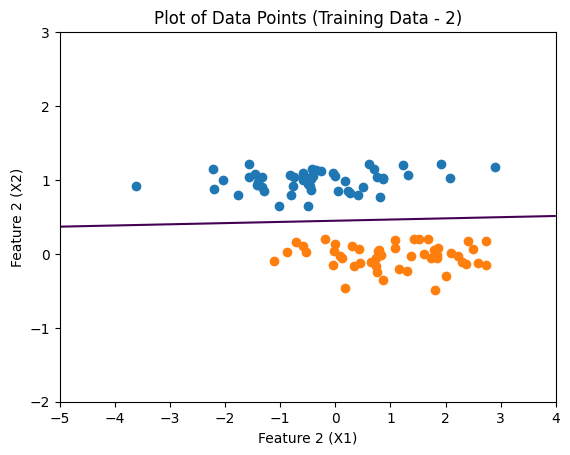

In [26]:
perceptron_2.plotDecisionBoundary(np.hstack((X_train_2, T_train_changed_2.reshape(n_train_2, 1))), w_vector=w_optimum_epochs_2, datasetName="Training Data - 2")

## 4. (c) Perform the following for Dataset - 3 of Homework -> 3


### i] Run the perceptron learning algorithm to find optimum w_vector using Sequential Gradient Descent.


In [27]:
perceptron_3 = perceptron.Perceptron()

In [28]:
n_train_3, X_train_3, T_train_3 = perceptron_3.generateTrainData(trainData=train_data_3)
X_train_augmented_3 = perceptron_3.augmentData(X=X_train_3, n=n_train_3)
print(f"Shape of Augmented X_train_3: {X_train_augmented_3.shape}")

T_train_changed_3 = perceptron_3.changeLabels(T = T_train_3)

X_train_shuffled_3, T_train_shuffled_3 = perceptron_3.shuffleData(X=X_train_augmented_3, T=T_train_changed_3.reshape(n_train_3, 1))

w_vector_3 = perceptron_3.initializeWeights(0.1)

---------------------------------------------------
  Shape of Input Data: (100, 3)
  Number of Data Points: 100
  Number of Input Features: 2
  Number of Target Classes: 2
---------------------------------------------------
Shape of Augmented X_train_3: (100, 3)


In [29]:
convergenceFlag_3, n_epochs_3, n_epochs_arr_3, n_iters_3, n_iters_arr_3, J_History_epochs_3, w_History_epochs_3, J_History_iterations_3, cer_History_epochs_3, cer_History_iterations_3 = perceptron_3.modelTrain_SequentialGD(
                                                                                                                                                                n_train = n_train_3, 
                                                                                                                                                                X_train=X_train_shuffled_3, 
                                                                                                                                                                T_train=T_train_shuffled_3, 
                                                                                                                                                                w_vector=w_vector_3, 
                                                                                                                                                                epochs=10, 
                                                                                                                                                                learn_rate=1)

###

### i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)


In [30]:
optimum_index_epochs_3 = np.argmin(J_History_epochs_3)
optimum_index_iterations_3 = np.argmin(cer_History_iterations_3)

w_optimum_epochs_3 = w_History_epochs_3[optimum_index_epochs_3]
J_optimum_epochs_3 = J_History_epochs_3[optimum_index_epochs_3]
J_optimum_iterations_3 = J_History_iterations_3[optimum_index_iterations_3]
cer_optimum_epochs_3 = cer_History_epochs_3[optimum_index_epochs_3]
cer_optimum_iterations_3 = cer_History_iterations_3[optimum_index_iterations_3]

In [31]:
if convergenceFlag_3:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters_3} iterations and {n_epochs_3} epoch(s) for Training set of Dataset - 3!")
    print("DATA IS LINEARLY SEPARABLE!!")
else:
    print("The Perceptron Learning Algorithm did not converge for Training set of Dataset - 3 and it took {n_iters_3} iterations and {n_epochs_3} epoch(s)")

print(f"The optimum value of w_vector for Training Set of Dataset - 3 is: {w_optimum_epochs_3}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs_3}")

The Perceptron Learning Algorithm did not converge for Training set of Dataset - 3 and it took {n_iters_3} iterations and {n_epochs_3} epoch(s)
The optimum value of w_vector for Training Set of Dataset - 3 is: [[ 2.1       ]
 [-0.87430611]
 [-2.01369415]]
The Final Criterion function value for optimum value of w is: 51.60901403749929


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

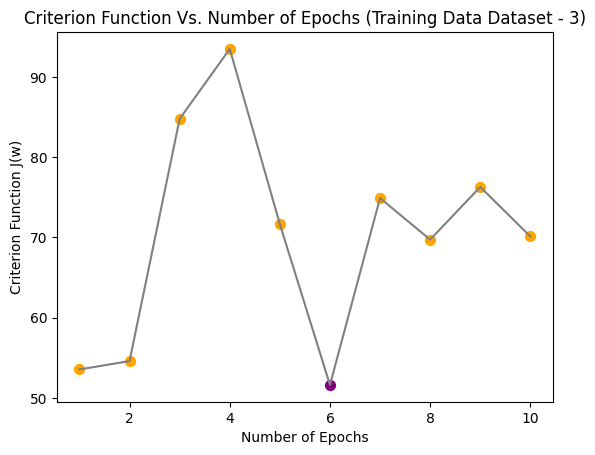

In [32]:
if n_epochs_3 <= 10:
    perceptron_3.plotCriterionVsIters(n_iters=n_iters_arr_3, J_History_iters=J_History_iterations_3, J_optimum_iters=J_optimum_iterations_3, datasetName="Training Data Dataset - 3")

else:
    perceptron_3.plotCriterionVsEpochs(n_epochs=n_epochs_arr_3, J_History_epochs=J_History_epochs_3, J_optimum_epochs=J_optimum_epochs_3, datasetName="Training Data Dataset - 3")

### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations

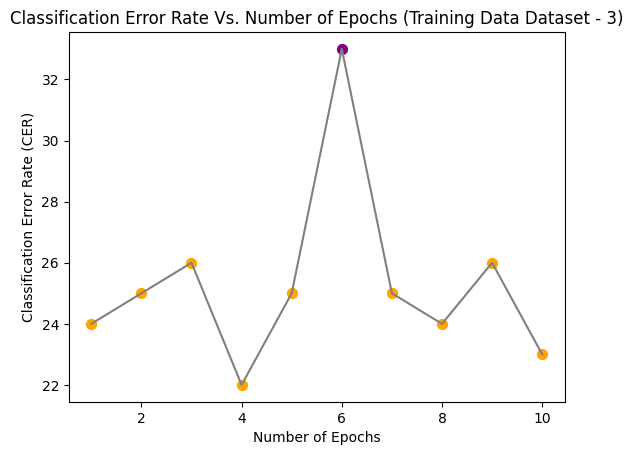

In [33]:
if n_epochs_3 <= 10:
    perceptron_3.plotCERVsIters(n_iters=n_iters_arr_3, cer_History_iters=cer_History_iterations_3, cer_optimum_iters=cer_optimum_iterations_3, datasetName="Training Data Dataset - 3")

else:
    perceptron_3.plotCERVsEpochs(n_epochs=n_epochs_arr_3, cer_History_epochs=cer_History_epochs_3, cer_optimum_epochs=cer_optimum_epochs_3, datasetName="Training Data Dataset - 3")


### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.

In [34]:
Y_hat_training_3 = perceptron_3.predict(X=X_train_augmented_3, w_optimum=w_optimum_epochs_3)
cer_training_3 = perceptron_3.calculateCER(T=T_train_changed_3, Y_hat=Y_hat_training_3, n=n_train_3)
print(f"Classification Error Rate (CER) on the training data of Dataset - 3 is: {cer_training_3}")

Classification Error Rate (CER) on the training data of Dataset - 3 is: 33.0


### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.


In [35]:
n_test_3, X_test_3, T_test_3 = perceptron_3.generateTestData(test_data=test_data_3)

X_test_augmented_3 = perceptron_3.augmentData(X=X_test_3, n=n_test_3)
print(f"Shape of Augmented X_test_3: {X_test_augmented_3.shape}")

T_test_changed_3 = perceptron_3.changeLabels(T = T_test_3)

Shape of Augmented X_test_3: (100, 3)


In [36]:
Y_hat_test_3 = perceptron_3.predict(X=X_test_augmented_3, w_optimum=w_optimum_epochs_3)
cer_test_3 = perceptron_3.calculateCER(T=T_test_changed_3, Y_hat=Y_hat_test_3, n=n_test_3)
print(f"Classification Error Rate (CER) on the test data of Dataset - 3 is: {cer_test_3}")

Classification Error Rate (CER) on the test data of Dataset - 3 is: 34.0


### iv] Plot in feature space the training data points, decision boundaries, and decision regions. The decision boundaries and regions should use the final optimum x_vector.

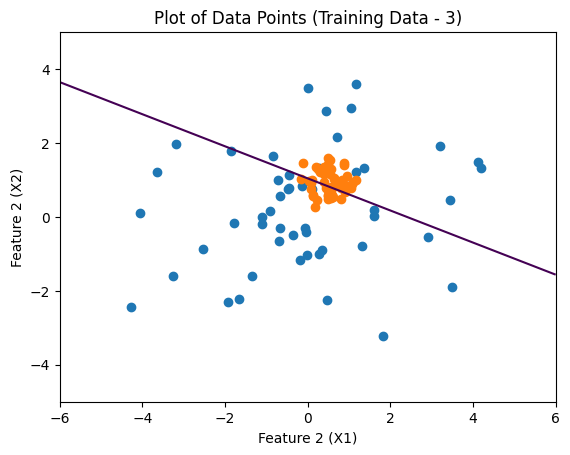

In [37]:
perceptron_3.plotDecisionBoundary(np.hstack((X_train_3, T_train_changed_3.reshape(n_train_3, 1))), w_vector=w_optimum_epochs_3, datasetName="Training Data - 3")

## (d) Breast Cancer Classification Problem using Sequential GD

### i] Run the perceptron learning algorithm to find optimum w_vector using Sequential Gradient Descent.


In [38]:
train_data_bc = np.load("./HW3_Datasets/breast_cancer_train.npy")
test_data_bc = np.load("./HW3_Datasets/breast_cancer_test.npy")

train_data_bc.shape

(480, 31)

In [39]:
perceptron_bc = perceptron.Perceptron()

In [40]:
n_train_bc, X_train_bc, T_train_bc = perceptron_bc.generateTrainDataNumpy(trainData=train_data_bc)

X_train_bc_normalized = 100 * normalize(X_train_bc, axis = 0, norm = "l1")

X_train_augmented_bc = perceptron_bc.augmentData(X=X_train_bc_normalized, n=n_train_bc)
print(f"Shape of Augmented X_train_bc: {X_train_augmented_bc.shape}")

T_train_changed_bc = perceptron_bc.changeLabels(T = T_train_bc)

X_train_shuffled_bc, T_train_shuffled_bc = perceptron_bc.shuffleData(X=X_train_augmented_bc, T=T_train_changed_bc.reshape(n_train_bc, 1))

w_vector_bc = perceptron_bc.initializeWeights(0.1)

---------------------------------------------------
  Shape of Input Data: (480, 31)
  Number of Data Points: 480
  Number of Input Features: 30
  Number of Target Classes: 2
---------------------------------------------------
Shape of Augmented X_train_bc: (480, 31)


In [41]:
convergenceFlag_bc, n_epochs_bc, n_epochs_arr_bc, n_iters_bc, n_iters_arr_bc, J_History_epochs_bc, w_History_epochs_bc, J_History_iterations_bc, cer_History_epochs_bc, cer_History_iterations_bc = perceptron_bc.modelTrain_SequentialGD(
                                                                                                                                                                n_train = n_train_bc, 
                                                                                                                                                                X_train=X_train_shuffled_bc, 
                                                                                                                                                                T_train=T_train_shuffled_bc, 
                                                                                                                                                                w_vector=w_vector_bc, 
                                                                                                                                                                epochs=10, 
                                                                                                                                                                learn_rate=1)

i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)

In [42]:
optimum_index_epochs_bc = np.argmin(J_History_epochs_bc)
optimum_index_iterations_bc = np.argmin(cer_History_iterations_bc)

w_optimum_epochs_bc = w_History_epochs_bc[optimum_index_epochs_bc]
J_optimum_epochs_bc = J_History_epochs_bc[optimum_index_epochs_bc]
J_optimum_iterations_bc = J_History_iterations_bc[optimum_index_iterations_bc]
cer_optimum_epochs_bc = cer_History_epochs_bc[optimum_index_epochs_bc]
cer_optimum_iterations_bc = cer_History_iterations_bc[optimum_index_iterations_bc]

In [43]:
if convergenceFlag_bc:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters_bc} iterations and {n_epochs_bc} epoch(s) for Training set of Breast Cancer Dataset!")
    print("DATA IS LINEARLY SEPARABLE!!")
else:
    print("The Perceptron Learning Algorithm did not converge for Training set of Breast Cancer Dataset and it took {n_iters_bc} iterations and {n_epochs_bc} epoch(s)!")

print(f"The optimum value of w_vector for Training Set of BC Dataset is: {w_optimum_epochs_bc}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs_bc}")

The Perceptron Learning Algorithm did not converge for Training set of Breast Cancer Dataset and it took {n_iters_bc} iterations and {n_epochs_bc} epoch(s)!
The optimum value of w_vector for Training Set of BC Dataset is: [[-6.9       ]
 [ 0.81555978]
 [ 2.39213304]
 [ 0.95321455]
 [ 3.26129554]
 [-0.98993105]
 [ 0.28298492]
 [ 4.84789019]
 [ 3.97697625]
 [-0.52798358]
 [-1.60106098]
 [ 0.4839705 ]
 [ 0.3315105 ]
 [ 0.52299337]
 [ 2.97207638]
 [-0.52080435]
 [-2.67780053]
 [-2.6323706 ]
 [-2.61788131]
 [ 0.22208498]
 [-3.24274989]
 [ 1.7519972 ]
 [ 3.69469628]
 [ 1.8869113 ]
 [ 4.8857735 ]
 [ 0.60938461]
 [ 2.77977268]
 [ 4.70819245]
 [ 3.40945606]
 [ 2.10762511]
 [ 0.07719816]]
The Final Criterion function value for optimum value of w is: 4.265603821208094


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

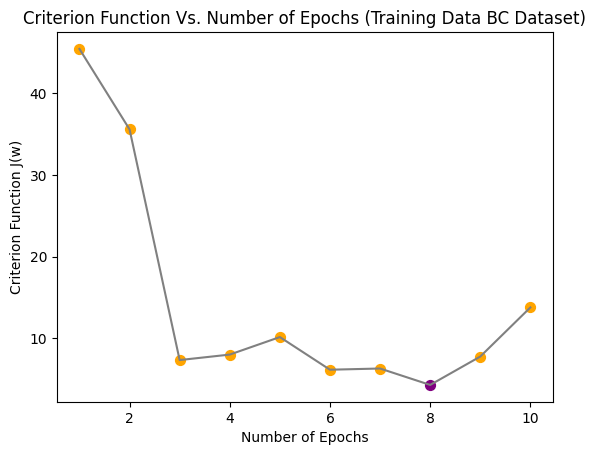

In [44]:
if n_epochs_bc <= 10:
    perceptron_bc.plotCriterionVsIters(n_iters=n_iters_arr_bc, J_History_iters=J_History_iterations_bc, J_optimum_iters=J_optimum_iterations_bc, datasetName="Training Data BC Dataset")

else:
    perceptron_bc.plotCriterionVsEpochs(n_epochs=n_epochs_arr_bc, J_History_epochs=J_History_epochs_bc, J_optimum_epochs=J_optimum_epochs_bc, datasetName="Training Data BC Dataset")


### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations

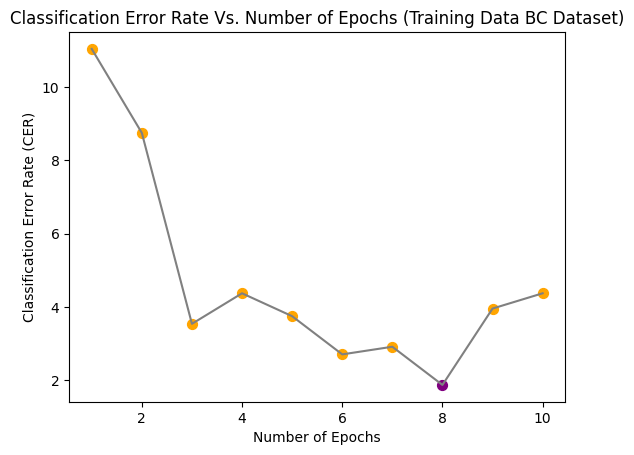

In [45]:
if n_epochs_bc <= 10:
    perceptron_bc.plotCERVsIters(n_iters=n_iters_arr_bc, cer_History_iters=cer_History_iterations_bc, cer_optimum_iters=cer_optimum_iterations_bc, datasetName="Training Data BC Dataset")

else:
    perceptron_bc.plotCERVsEpochs(n_epochs=n_epochs_arr_bc, cer_History_epochs=cer_History_epochs_bc, cer_optimum_epochs=cer_optimum_epochs_bc, datasetName="Training Data BC Dataset")


### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.


In [46]:
Y_hat_training_bc = perceptron_bc.predict(X=X_train_augmented_bc, w_optimum=w_optimum_epochs_bc)
cer_training_bc = perceptron_bc.calculateCER(T=T_train_changed_bc, Y_hat=Y_hat_training_bc, n=n_train_bc)
print(f"Classification Error Rate (CER) on the training data of BC Dataset is: {cer_training_bc}")

Classification Error Rate (CER) on the training data of BC Dataset is: 1.875


### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.


In [47]:
n_test_bc, X_test_bc, T_test_bc = perceptron_bc.generateTestDataNumy(test_data=test_data_bc)

X_test_bc_normalized = 100 * normalize(X_test_bc, axis = 0, norm = "l1")

X_test_augmented_bc = perceptron_bc.augmentData(X=X_test_bc_normalized, n=n_test_bc)
print(f"Shape of Augmented X_test_bc: {X_test_augmented_bc.shape}")

T_test_changed_bc = perceptron_bc.changeLabels(T = T_test_bc)

Shape of Augmented X_test_bc: (89, 31)


In [48]:
Y_hat_test_bc = perceptron_bc.predict(X=X_test_augmented_bc, w_optimum=w_optimum_epochs_bc)
cer_test_bc = perceptron_bc.calculateCER(T=T_test_changed_bc, Y_hat=Y_hat_test_bc, n=n_test_bc)
print(f"Classification Error Rate (CER) on the test data of BC Dataset is: {cer_test_bc}")

Classification Error Rate (CER) on the test data of BC Dataset is: 60.67415730337079


### 4. (d) iv] Is the 2-class data linearly separable? Answer yes, no, or don’t know. Briefly justify your answer.

### <strong> <em> The 2 - class Breast Cancer Data is not Linearly Separable! </strong></em>

### iv] Instead produce a histogram of the distance from the decision boundary ( g(x) / |𝑤|| ). On the same plot, produce a histogram of this quantity for all class 1 training data and another for all class 2 training data.

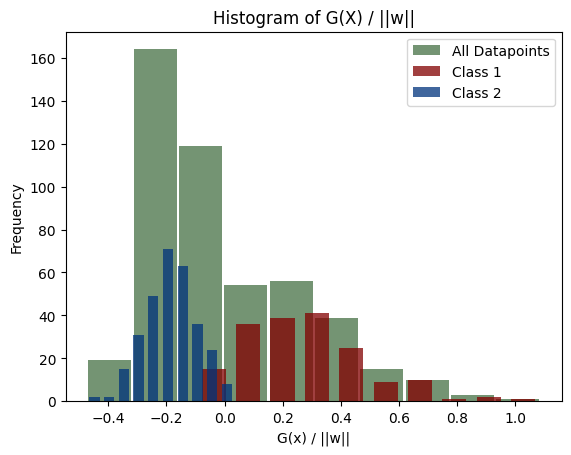

In [49]:
perceptron_bc.plotHistogram(X=X_train_augmented_bc, T=T_train_changed_bc, w_vector=w_optimum_epochs_bc, n_train=n_train_bc)